# 2장. 서울시 범죄 현황 분석
## 2-1 데이터 획득하기
## 2-2 pandas를 이용하여 데이터 정리하기

In [61]:
import numpy as np
import pandas as pd

In [62]:
crime_anal_police = pd.read_csv('data/02. crime_in_Seoul.csv', thousands=',', 
                                encoding='euc-kr')
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861


In [63]:
import googlemaps

In [64]:
gmaps_key = "******************"   # 본인의 Google Maps API Key

In [65]:
gmaps = googlemaps.Client(key=gmaps_key)

In [66]:
gmaps.geocode('서울중부경찰서', language='ko')

[{'address_components': [{'long_name': '２７',
    'short_name': '２７',
    'types': ['premise']},
   {'long_name': '수표로',
    'short_name': '수표로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '을지로동',
    'short_name': '을지로동',
    'types': ['political', 'sublocality', 'sublocality_level_2']},
   {'long_name': '중구',
    'short_name': '중구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '100-032',
    'short_name': '100-032',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 중구 을지로동 수표로 27',
  'geometry': {'location': {'lat': 37.5636465, 'lng': 126.9895796},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.56499548029149,
     'lng': 126.9909285802915},
    'southwest': {'lat': 3

In [67]:
station_name = []
for name in crime_anal_police['관서명']:
    station_name.append('서울' + str(name[:-1]) + '경찰서')

station_name

['서울중부경찰서',
 '서울종로경찰서',
 '서울남대문경찰서',
 '서울서대문경찰서',
 '서울혜화경찰서',
 '서울용산경찰서',
 '서울성북경찰서',
 '서울동대문경찰서',
 '서울마포경찰서',
 '서울영등포경찰서',
 '서울성동경찰서',
 '서울동작경찰서',
 '서울광진경찰서',
 '서울서부경찰서',
 '서울강북경찰서',
 '서울금천경찰서',
 '서울중랑경찰서',
 '서울강남경찰서',
 '서울관악경찰서',
 '서울강서경찰서',
 '서울강동경찰서',
 '서울종암경찰서',
 '서울구로경찰서',
 '서울서초경찰서',
 '서울양천경찰서',
 '서울송파경찰서',
 '서울노원경찰서',
 '서울방배경찰서',
 '서울은평경찰서',
 '서울도봉경찰서',
 '서울수서경찰서']

In [68]:
station_address = []
station_lat = []
station_lng = []

for name in station_name:
    tmp = gmaps.geocode(name, language='ko')
    station_address.append(tmp[0].get("formatted_address"))
    
    tmp_loc = tmp[0].get("geometry")

    station_lat.append(tmp_loc['location']['lat'])
    station_lng.append(tmp_loc['location']['lng'])
    
    print(name + '-->' + tmp[0].get("formatted_address"))

서울중부경찰서-->대한민국 서울특별시 중구 을지로동 수표로 27
서울종로경찰서-->대한민국 서울특별시 종로구 종로1.2.3.4가동 율곡로 46
서울남대문경찰서-->대한민국 서울특별시 중구 회현동 한강대로 410
서울서대문경찰서-->대한민국 서울특별시 서대문구 충현동 통일로 113
서울혜화경찰서-->대한민국 서울특별시 종로구 인의동 창경궁로 112-16
서울용산경찰서-->대한민국 서울특별시 용산구 원효로1가 원효로89길 24
서울성북경찰서-->대한민국 서울특별시 성북구 삼선동5가 301
서울동대문경찰서-->대한민국 서울특별시 동대문구 청량리동 약령시로21길 29
서울마포경찰서-->대한민국 서울특별시 마포구 아현동 618-1
서울영등포경찰서-->대한민국 서울특별시 영등포구 영등포동 영등포로46길 14
서울성동경찰서-->대한민국 서울특별시 성동구 행당동 왕십리광장로 9
서울동작경찰서-->대한민국 서울특별시 동작구 노량진1동 노량진로 148
서울광진경찰서-->대한민국 서울특별시 광진구 구의동 자양로 167
서울서부경찰서-->대한민국 서울특별시 은평구 대조동 통일로 757
서울강북경찰서-->대한민국 서울특별시 강북구 번1동 오패산로 406
서울금천경찰서-->대한민국 서울특별시 금천구 시흥동 190
서울중랑경찰서-->대한민국 서울특별시 중랑구 신내1동 신내역로3길 40-10
서울강남경찰서-->대한민국 서울특별시 강남구 대치동 998
서울관악경찰서-->대한민국 서울특별시 관악구 봉천동
서울강서경찰서-->대한민국 서울특별시 양천구 신월동 화곡로 73
서울강동경찰서-->대한민국 서울특별시 강동구 성내1동 성내로 57
서울종암경찰서-->대한민국 서울특별시 성북구 종암동 종암로 135
서울구로경찰서-->대한민국 서울특별시 구로구 가마산로 235
서울서초경찰서-->대한민국 서울특별시 서초구 서초3동 반포대로 179
서울양천경찰서-->대한민국 서울특별시 양천구 신정6동 목동동로 99
서울송파경찰서-->대한민국 서울특별시 송파구 가락본동 9
서울노원경찰서-->대한민국 서울특별시 노원구

In [69]:
station_lat

[37.5636465,
 37.5755578,
 37.5547584,
 37.5647848,
 37.5718529,
 37.5411211,
 37.5897482,
 37.58506149999999,
 37.550814,
 37.5179839,
 37.5617309,
 37.5130866,
 37.542873,
 37.6128611,
 37.63730390000001,
 37.4568722,
 37.618692,
 37.5094352,
 37.4743789,
 37.5397827,
 37.528511,
 37.6020592,
 37.494931,
 37.4956054,
 37.5165667,
 37.5019065,
 37.6423605,
 37.4945959,
 37.6283597,
 37.6533589,
 37.49349]

In [10]:
station_lng

[126.9895796,
 126.9848674,
 126.9734981,
 126.9667762,
 126.9989143,
 126.9676935,
 127.0161353,
 127.0457679,
 126.954028,
 126.9075056,
 127.0363806,
 126.9428498,
 127.083821,
 126.9274951,
 127.0273399,
 126.8970429,
 127.1047136,
 127.0669578,
 126.9509748,
 126.8299968,
 127.1268224,
 127.0321577,
 126.886731,
 127.0052504,
 126.8656763,
 127.1271513,
 127.0714027,
 126.9831279,
 126.9287226,
 127.052682,
 127.0772119]

In [70]:
station_address[0]

'대한민국 서울특별시 중구 을지로동 수표로 27'

In [71]:
gu_name = []

for name in station_address:
    tmp = name.split()
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]
    gu_name.append(tmp_gu)
    
crime_anal_police['구별'] = gu_name
crime_anal_police.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [72]:
crime_anal_police.loc[crime_anal_police['관서명']=='강서서', ['구별']] = '강서구'
crime_anal_police[crime_anal_police['관서명']=='강서서']

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
19,강서서,7,8,13,13,262,191,2096,1260,3207,2718,강서구


In [73]:
crime_anal_police.to_csv('data/02. crime_in_Seoul_include_gu_name.csv',
                         sep=',', encoding='utf-8')

## 2-6 Pivot-table을 이용해서 데이터 정리하기

In [74]:
crime_anal_raw = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv', 
                             encoding='utf-8')
crime_anal_raw.head()

,Unnamed: 0,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [75]:
crime_anal_raw = pd.read_csv('data/02. crime_in_Seoul_include_gu_name.csv', 
                             encoding='utf-8', index_col=0)

crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)
crime_anal.head()

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
강서구,191,262,13,13,8,7,1260,2096,2718,3207
관악구,221,320,14,12,8,9,827,2706,2642,3298


In [76]:
crime_anal['강간검거율'] = (crime_anal['강간 검거']/crime_anal['강간 발생']*100).round(2)
crime_anal['강도검거율'] = (crime_anal['강도 검거']/crime_anal['강도 발생']*100).round(2)
crime_anal['살인검거율'] = (crime_anal['살인 검거']/crime_anal['살인 발생']*100).round(2)
crime_anal['절도검거율'] = (crime_anal['절도 검거']/crime_anal['절도 발생']*100).round(2)
crime_anal['폭력검거율'] = (crime_anal['폭력 검거']/crime_anal['폭력 발생']*100).round(2)

del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['살인 검거']
del crime_anal['절도 검거']
del crime_anal['폭력 검거']

crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.73,85.71,76.92,42.86,86.48
강동구,156,6,4,2366,2712,78.85,133.33,75.00,33.35,82.89
강북구,153,14,7,1434,2649,82.35,92.86,114.29,43.10,88.64
강서구,262,13,7,2096,3207,72.90,100.00,114.29,60.11,84.75
관악구,320,12,9,2706,3298,69.06,116.67,88.89,30.56,80.11


In [77]:
# 검거율이 100 이상인 항목을 100으로 조정
con_list = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100
    
crime_anal.head()

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.73,85.71,76.92,42.86,86.48
강동구,156,6,4,2366,2712,78.85,100.00,75.00,33.35,82.89
강북구,153,14,7,1434,2649,82.35,92.86,100.00,43.10,88.64
강서구,262,13,7,2096,3207,72.90,100.00,100.00,60.11,84.75
관악구,320,12,9,2706,3298,69.06,100.00,88.89,30.56,80.11


In [78]:
crime_anal.rename(columns = {'강간 발생':'강간', 
                             '강도 발생':'강도', 
                             '살인 발생':'살인', 
                             '절도 발생':'절도', 
                             '폭력 발생':'폭력'}, inplace=True)
crime_anal.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,449,21,13,3850,4284,77.73,85.71,76.92,42.86,86.48
강동구,156,6,4,2366,2712,78.85,100.00,75.00,33.35,82.89
강북구,153,14,7,1434,2649,82.35,92.86,100.00,43.10,88.64
강서구,262,13,7,2096,3207,72.90,100.00,100.00,60.11,84.75
관악구,320,12,9,2706,3298,69.06,100.00,88.89,30.56,80.11


In [79]:
from sklearn import preprocessing

col = ['강간', '강도', '살인', '절도', '폭력']

x = crime_anal[col].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x.astype(float)).round(4)
crime_anal_norm = pd.DataFrame(x_scaled, columns = col, index = crime_anal.index)

col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.0000,0.9412,0.9167,1.0000,1.0000,77.73,85.71,76.92,42.86,86.48
강동구,0.1556,0.0588,0.1667,0.4675,0.4380,78.85,100.00,75.00,33.35,82.89
강북구,0.1470,0.5294,0.4167,0.1331,0.4154,82.35,92.86,100.00,43.10,88.64
강서구,0.4611,0.4706,0.4167,0.3706,0.6149,72.90,100.00,100.00,60.11,84.75
관악구,0.6282,0.4118,0.5833,0.5895,0.6475,69.06,100.00,88.89,30.56,80.11


In [80]:
result_CCTV = pd.read_csv('data/01. CCTV_result.csv', encoding='UTF-8', 
                          index_col='구별')
crime_anal_norm[['인구수', 'CCTV']] = result_CCTV[['인구수', '소계']]
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.0000,0.9412,0.9167,1.0000,1.0000,77.73,85.71,76.92,42.86,86.48,570500.0,2780
강동구,0.1556,0.0588,0.1667,0.4675,0.4380,78.85,100.00,75.00,33.35,82.89,453233.0,773
강북구,0.1470,0.5294,0.4167,0.1331,0.4154,82.35,92.86,100.00,43.10,88.64,330192.0,748
강서구,0.4611,0.4706,0.4167,0.3706,0.6149,72.90,100.00,100.00,60.11,84.75,603772.0,884
관악구,0.6282,0.4118,0.5833,0.5895,0.6475,69.06,100.00,88.89,30.56,80.11,525515.0,1496


In [81]:
col = ['강간','강도','살인','절도','폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.0000,0.9412,0.9167,1.0000,1.0000,77.73,85.71,76.92,42.86,86.48,570500.0,2780,4.8579
강동구,0.1556,0.0588,0.1667,0.4675,0.4380,78.85,100.00,75.00,33.35,82.89,453233.0,773,1.2866
강북구,0.1470,0.5294,0.4167,0.1331,0.4154,82.35,92.86,100.00,43.10,88.64,330192.0,748,1.6416
강서구,0.4611,0.4706,0.4167,0.3706,0.6149,72.90,100.00,100.00,60.11,84.75,603772.0,884,2.3339
관악구,0.6282,0.4118,0.5833,0.5895,0.6475,69.06,100.00,88.89,30.56,80.11,525515.0,1496,2.8603


In [82]:
col = ['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.0000,0.9412,0.9167,1.0000,1.0000,77.73,85.71,76.92,42.86,86.48,570500.0,2780,4.8579,369.70
강동구,0.1556,0.0588,0.1667,0.4675,0.4380,78.85,100.00,75.00,33.35,82.89,453233.0,773,1.2866,370.09
강북구,0.1470,0.5294,0.4167,0.1331,0.4154,82.35,92.86,100.00,43.10,88.64,330192.0,748,1.6416,406.95
강서구,0.4611,0.4706,0.4167,0.3706,0.6149,72.90,100.00,100.00,60.11,84.75,603772.0,884,2.3339,417.76
관악구,0.6282,0.4118,0.5833,0.5895,0.6475,69.06,100.00,88.89,30.56,80.11,525515.0,1496,2.8603,368.62


In [83]:
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.0000,0.9412,0.9167,1.0000,1.0000,77.73,85.71,76.92,42.86,86.48,570500.0,2780,4.8579,369.70
강동구,0.1556,0.0588,0.1667,0.4675,0.4380,78.85,100.00,75.00,33.35,82.89,453233.0,773,1.2866,370.09
강북구,0.1470,0.5294,0.4167,0.1331,0.4154,82.35,92.86,100.00,43.10,88.64,330192.0,748,1.6416,406.95
강서구,0.4611,0.4706,0.4167,0.3706,0.6149,72.90,100.00,100.00,60.11,84.75,603772.0,884,2.3339,417.76
관악구,0.6282,0.4118,0.5833,0.5895,0.6475,69.06,100.00,88.89,30.56,80.11,525515.0,1496,2.8603,368.62
광진구,0.3977,0.5294,0.1667,0.7043,0.4069,91.67,100.00,100.00,42.20,83.05,372164.0,707,2.2050,416.92
구로구,0.5159,0.5882,0.5000,0.4564,0.5434,58.36,73.33,75.00,38.07,80.88,447874.0,1561,2.6039,325.64
금천구,0.1412,0.0588,0.0833,0.1808,0.2027,80.79,100.00,100.00,56.67,86.47,255082.0,1015,0.6668,423.93
노원구,0.2738,0.1176,0.6667,0.4055,0.4419,61.42,100.00,100.00,36.53,85.53,569384.0,1265,1.9055,383.48


- Visualization using seaborn

In [84]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10

In [86]:
import seaborn as sns

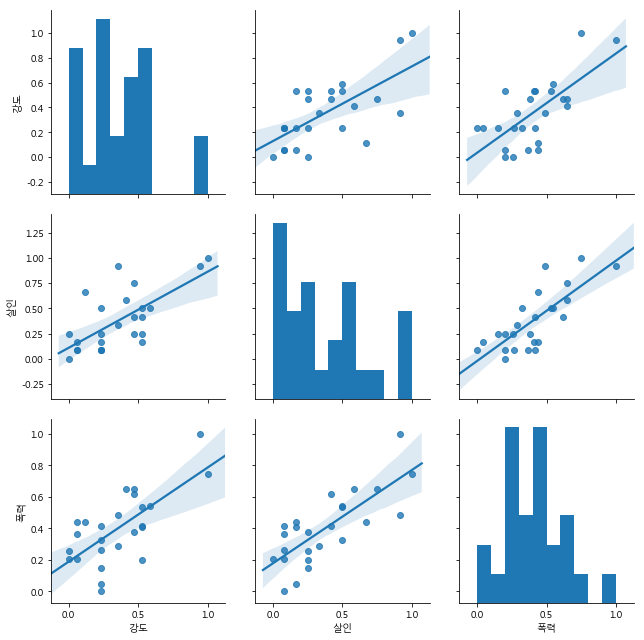

In [87]:
sns.pairplot(crime_anal_norm, vars=["강도", "살인", "폭력"], kind='reg', height=3)
plt.show()

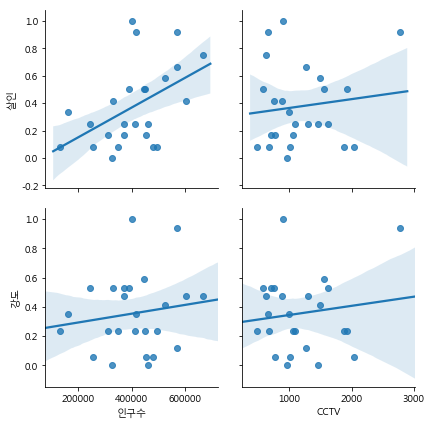

In [88]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["살인", "강도"], kind='reg', height=3)
plt.show()

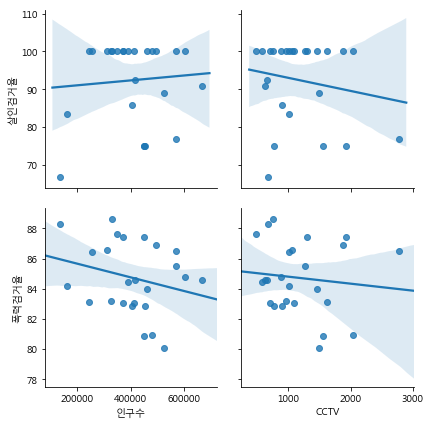

In [89]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["살인검거율", "폭력검거율"], kind='reg', height=3)
plt.show()

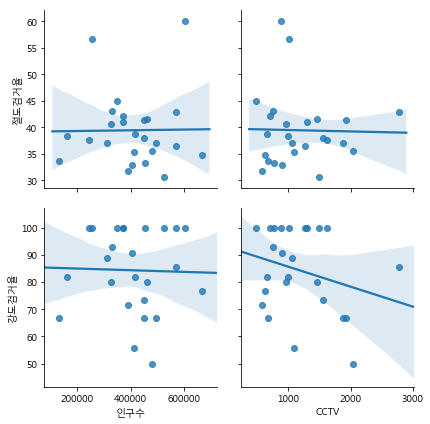

In [90]:
sns.pairplot(crime_anal_norm, x_vars=["인구수", "CCTV"], 
             y_vars=["절도검거율", "강도검거율"], kind='reg', height=3)
plt.show()

In [91]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = (crime_anal_norm['검거'] / tmp_max * 100).round(2)
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
도봉구,0.0000,0.2353,0.0833,0.0000,0.0000,100.00,100.0,100.0,44.97,87.63,348646.0,485,0.3186,100.00
금천구,0.1412,0.0588,0.0833,0.1808,0.2027,80.79,100.0,100.0,56.67,86.47,255082.0,1015,0.6668,98.00
강서구,0.4611,0.4706,0.4167,0.3706,0.6149,72.90,100.0,100.0,60.11,84.75,603772.0,884,2.3339,96.57
광진구,0.3977,0.5294,0.1667,0.7043,0.4069,91.67,100.0,100.0,42.20,83.05,372164.0,707,2.2050,96.38
동대문구,0.2046,0.4706,0.2500,0.3294,0.3793,84.39,100.0,100.0,41.09,87.40,369496.0,1294,1.6339,95.44


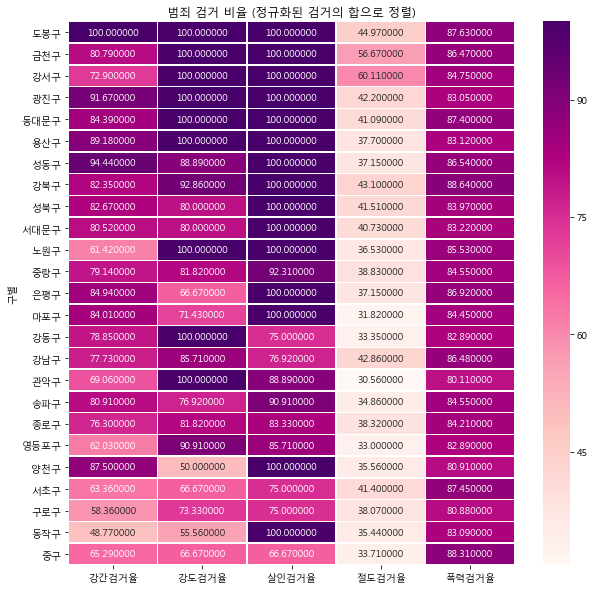

In [92]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', 
                    linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

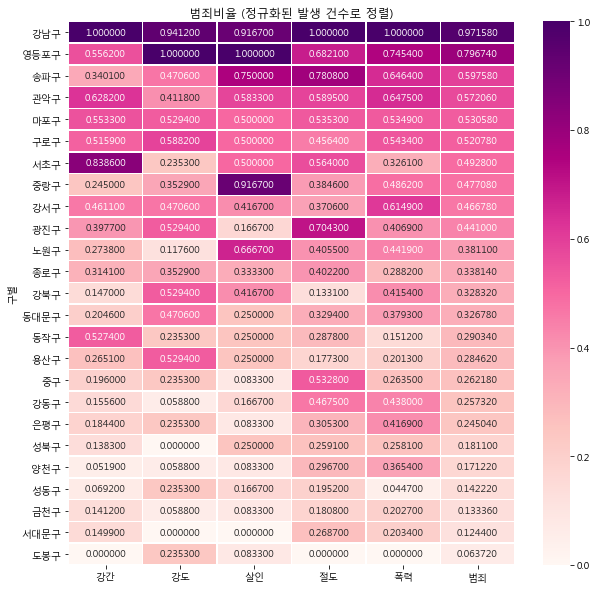

In [93]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']

crime_anal_norm['범죄'] = crime_anal_norm['범죄'] / 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize = (10,10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('범죄비율 (정규화된 발생 건수로 정렬)')
plt.show()

In [94]:
crime_anal_norm.to_csv('data/02. crime_in_Seoul_final.csv', sep=',', 
                       encoding='euc-kr')

## 2-10 서울시 범죄율에 대한 지도 시각화

In [95]:
import json
geo_path = 'data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [96]:
import folium
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['살인'],
               columns = [crime_anal_norm.index, crime_anal_norm['살인']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [97]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['강간'],
               columns = [crime_anal_norm.index, crime_anal_norm['강간']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [98]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [99]:
tmp_criminal = crime_anal_norm['살인'] /  crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [100]:
tmp_criminal = crime_anal_norm['범죄'] /  crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime_anal.index, tmp_criminal],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [101]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['검거'],
               columns = [crime_anal_norm.index, crime_anal_norm['검거']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map

## 2-11 경찰서별 검거율과 구별 범죄발생율을 동시에 표현하기

In [102]:
crime_anal_raw['lat'] = station_lat
crime_anal_raw['lng'] = station_lng

col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_anal_raw[col] / crime_anal_raw[col].max()
    
crime_anal_raw['검거'] = np.sum(tmp, axis=1)

crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별,lat,lng,검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구,37.563646,126.989580,1.275416
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구,37.575558,126.984867,1.523847
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구,37.554758,126.973498,0.907372
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구,37.564785,126.966776,1.978299
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구,37.571853,126.998914,1.198382


In [103]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.Marker([crime_anal_raw['lat'][n], 
                   crime_anal_raw['lng'][n]]).add_to(map)
    
map

In [104]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]], 
                        radius = crime_anal_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map

In [105]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime_anal_norm['범죄'],
               columns = [crime_anal_norm.index, crime_anal_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

for n in crime_anal_raw.index:
    folium.CircleMarker([crime_anal_raw['lat'][n], crime_anal_raw['lng'][n]], 
                        radius = crime_anal_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map